In [2]:
# Starts at 19/03/01

import numpy as np
from matplotlib import pyplot as plt
from google.colab import drive

np.random.seed(42)
drive.mount('/gdrive')

Drive already mounted at /gdrive; to attempt to forcibly remount, call drive.mount("/gdrive", force_remount=True).


In [0]:
X = 2*np.random.rand(100, 1)
y = 4 + 3*X + np.random.randn(100, 1)

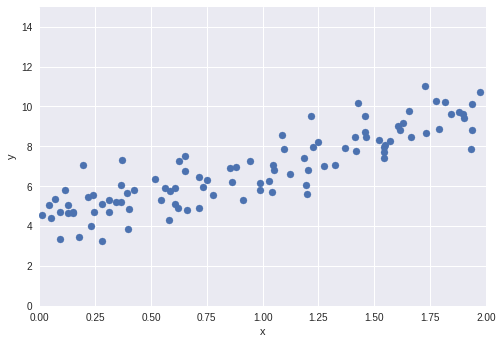

In [7]:
plt.scatter(X, y)
plt.xlabel('x')
plt.ylabel('y')
plt.xlim(0, 2)
plt.ylim(0, 15)
plt.show()

In [0]:
X_b = np.c_[np.ones((100, 1)), X]
theta_best= np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)

In [10]:
theta_best

array([[4.21509616],
       [2.77011339]])

In [11]:
X_new = np.array([[0], [2]])
X_new_b = np.c_[np.ones((2, 1)), X_new]
y_predict = X_new_b.dot(theta_best)
y_predict

array([[4.21509616],
       [9.75532293]])

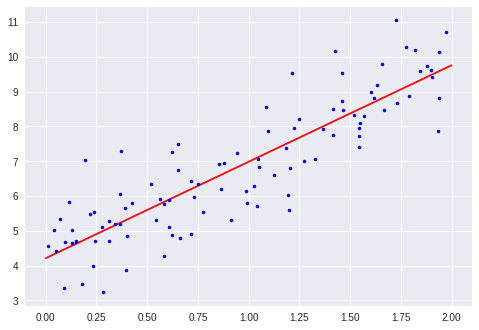

In [12]:
plt.plot(X_new, y_predict, "r-")
plt.plot(X, y, 'b.')
plt.show()

In [14]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(X, y)
lin_reg.intercept_, lin_reg.coef_

(array([4.21509616]), array([[2.77011339]]))

In [15]:
lin_reg.predict(X_new)

array([[4.21509616],
       [9.75532293]])

In [0]:
lr = 0.1
n_iter = 1000
m = 100 # Used in SGD(two shells after)

theta = np.random.randn(2, 1)

for iter in range(n_iter):
  grad = 2/m*X_b.T.dot(X_b.dot(theta) - y)
  theta -= lr*grad

In [17]:
theta

array([[4.21509616],
       [2.77011339]])

In [0]:
n_epoches = 50
t0, t1 = 5, 50

def learning_schedule(t):
  return t0 / (t1 + t)

theta = np.random.randn(2, 1)

for epoch in range(n_epoches):
  for i in range(m):
    rand_idx = np.random.randint(m)
    xi = X_b[rand_idx:rand_idx+1]
    yi = y[rand_idx:rand_idx+1]
    grad = 2*xi.T.dot(xi.dot(theta) - yi)
    eta = learning_schedule(epoch*m + i)
    
    theta -= eta*grad
   

In [20]:
theta

array([[4.18204924],
       [2.72749036]])

In [21]:
from sklearn.linear_model import SGDRegressor
sgd_reg = SGDRegressor(max_iter=50, penalty=None, eta0=0.1)
sgd_reg.fit(X, y.ravel())

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/stochastic_gradient.py:183: FutureWarning: max_iter and tol parameters have been added in SGDRegressor in 0.19. If max_iter is set but tol is left unset, the default value for tol in 0.19 and 0.20 will be None (which is equivalent to -infinity, so it has no effect) but will change in 0.21 to 1e-3. Specify tol to silence this warning.
  FutureWarning)


SGDRegressor(alpha=0.0001, average=False, early_stopping=False, epsilon=0.1,
       eta0=0.1, fit_intercept=True, l1_ratio=0.15,
       learning_rate='invscaling', loss='squared_loss', max_iter=50,
       n_iter=None, n_iter_no_change=5, penalty=None, power_t=0.25,
       random_state=None, shuffle=True, tol=None, validation_fraction=0.1,
       verbose=0, warm_start=False)

In [22]:
sgd_reg.intercept_, sgd_reg.coef_

(array([4.20999201]), array([2.77931137]))